In [212]:
#Importing Tensorflow
import tensorflow as tf

In [213]:
#Checking the Version of Tensorflow
print(tf.__version__)

2.9.1


In [214]:
#Importing other libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [215]:
#Loading Dataset
mnist = tf.keras.datasets.fashion_mnist

In [216]:
#Splitting into variables
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [217]:
#Dimension of each Image
x_train.shape

(60000, 28, 28)

In [218]:
#Finding the number of classes
len(np.unique(y_test))

10

In [219]:
#Maximum Value
np.max(x_train[0])

255

In [220]:
#Minimum Value
np.min(x_train[0])

0

Checking out the Images of each class

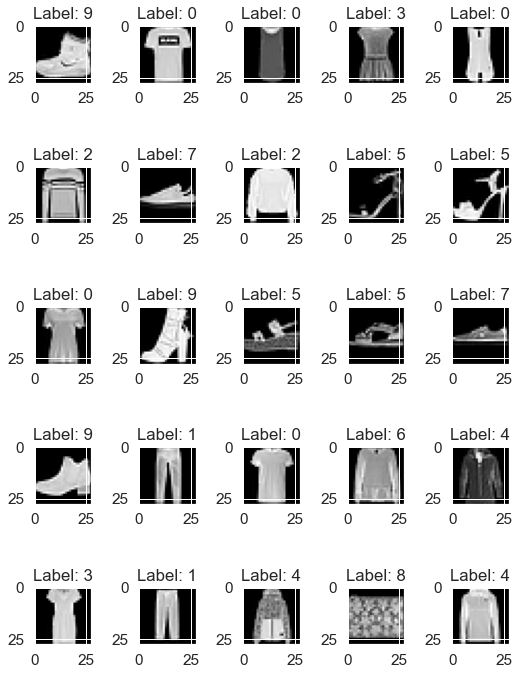

In [256]:
# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

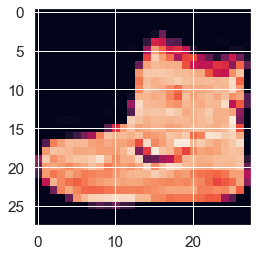

In [257]:
plt.imshow(x_train[0])

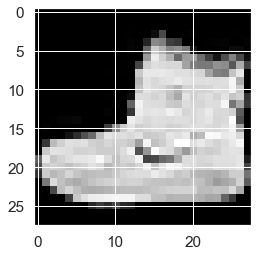

In [258]:
plt.imshow(x_train[0],cmap = 'gray')

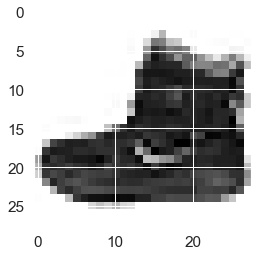

In [259]:
plt.imshow(x_train[0],cmap = 'binary')

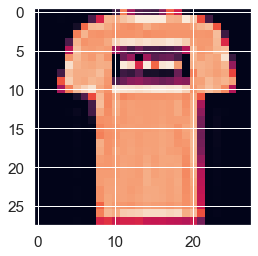

In [260]:
plt.imshow(x_train[1])

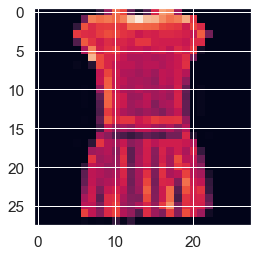

In [261]:
plt.imshow(x_train[3])

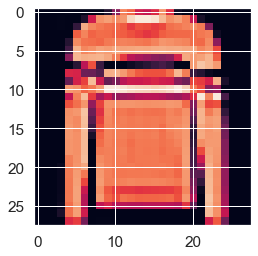

In [262]:
plt.imshow(x_train[5])

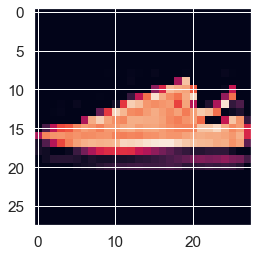

In [263]:
plt.imshow(x_train[6])

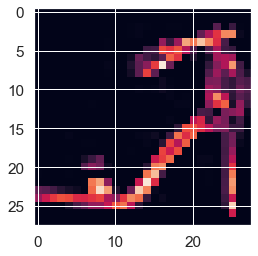

In [264]:
plt.imshow(x_train[8])

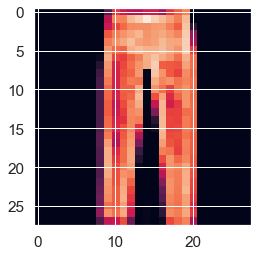

In [265]:
plt.imshow(x_train[16])

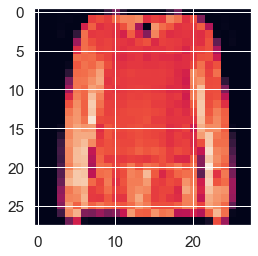

In [266]:
plt.imshow(x_train[18])

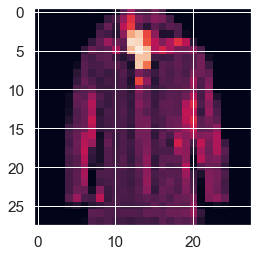

In [267]:
plt.imshow(x_train[19])

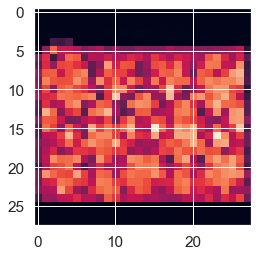

In [268]:
plt.imshow(x_train[23])

In [233]:
#Performing Normalization
x_train = x_train/255.0
x_test = x_test/255.0

### Model 1 (2 Hidden Layers)

In [234]:
#Building Model1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=[28,28], name="InputLayer"))
model1.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [235]:
#Process during compilation of Model1
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
batch_size = 32
epochs = 10
M1 = model1.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4837 - accuracy: 0.8256 - val_loss: 0.3981 - val_accuracy: 0.8513
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3626 - accuracy: 0.8678 - val_loss: 0.3534 - val_accuracy: 0.8685
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3272 - accuracy: 0.8789 - val_loss: 0.3471 - val_accuracy: 0.8800
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3024 - accuracy: 0.8884 - val_loss: 0.3411 - val_accuracy: 0.8728
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.8938 - val_loss: 0.3368 - val_accuracy: 0.8800
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2713 - accuracy: 0.8974 - val_loss: 0.3200 - val_accuracy: 0.8832
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9025 - val_loss: 0.3156 - val_accuracy:

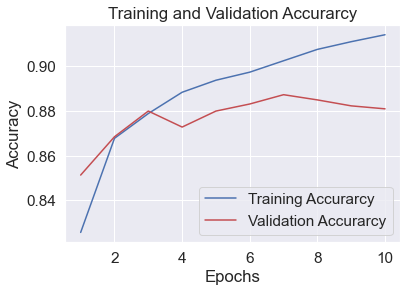

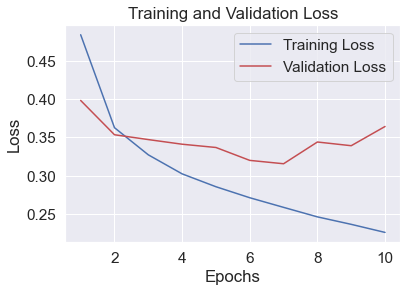

In [236]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = M1.history['accuracy']
val_acc = M1.history['val_accuracy']
loss = M1.history['loss']
val_loss = M1.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [237]:
#Calculating the Confusion Matrix of Model1
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model1.predict(x_test, len(y_test)//batch_size)
y_pred1 = np.argmax(Y_pred1, axis=1)
print('Confusion Matrix')
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

33/33 [==============================] - 0s 2ms/step
Confusion Matrix
[[882   0   9  37   3   1  61   0   7   0]
 [  4 962   3  25   4   0   1   0   1   0]
 [ 19   0 870  24  51   0  35   0   1   0]
 [ 17   4   7 938  24   0   8   0   2   0]
 [  0   0 168  41 761   0  27   0   3   0]
 [  0   0   0   0   0 921   0  61   5  13]
 [155   0 130  50  90   0 563   0  12   0]
 [  0   0   0   0   0   1   0 986   2  11]
 [  6   0   1   6   2   1   1   5 978   0]
 [  0   0   0   0   0   6   1  63   0 930]]


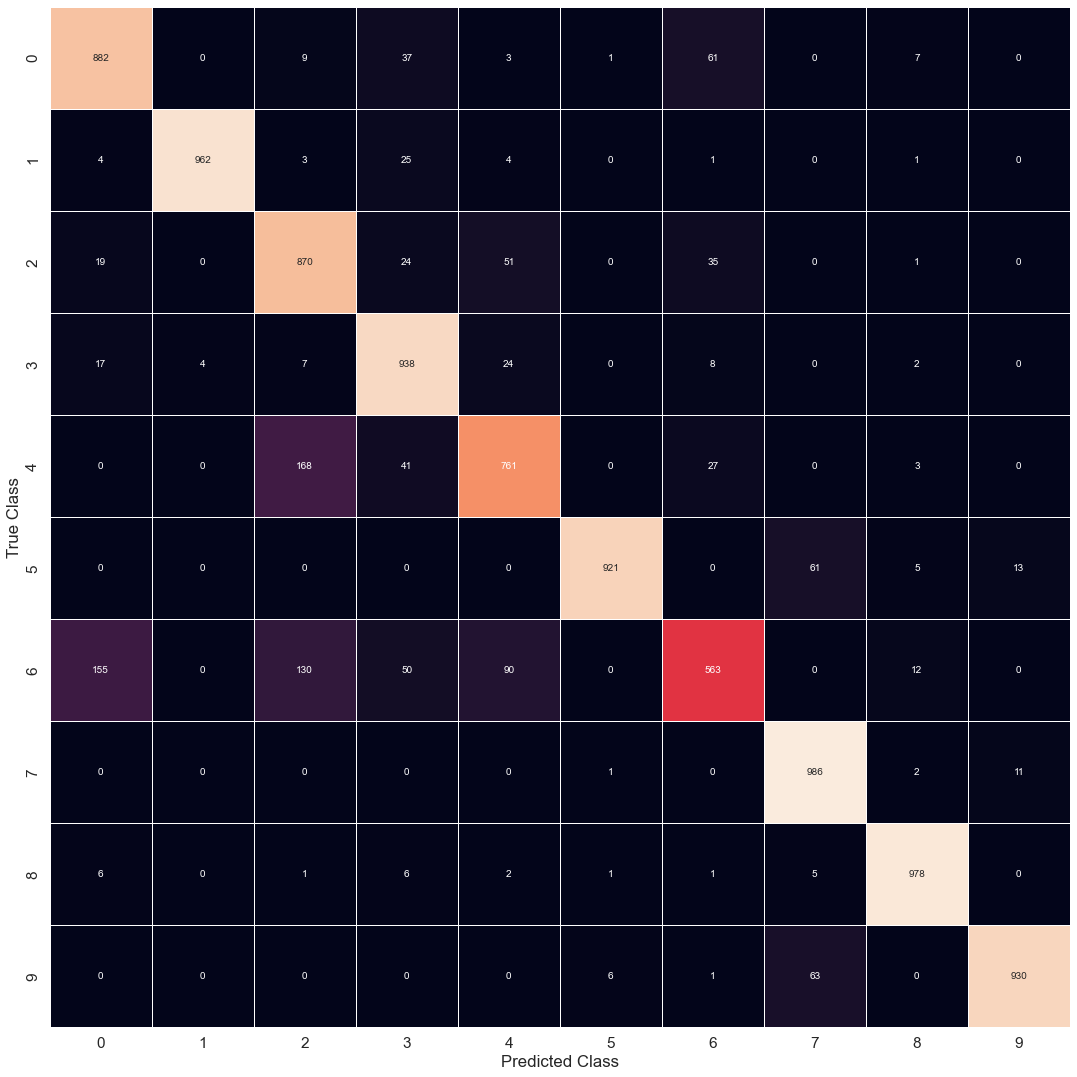

In [238]:
#Plotting The Confusion Matrix using Seaborn of Model1
class_labels=["0", "1","2","3","4","5","6","7","8","9"]
confusion_matrix = pd.DataFrame(cm1, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4)
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt="g", linewidths=1, cbar=False)
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [239]:
#Evaluating The Model1
model1.evaluate(x_test, y_test)
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred1))

313/313 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8791
Accuracy :  0.8791


### Model 2 (5 Hidden Layers)

In [240]:
#Creating Model2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[28,28], name="InputLayer"))
model2.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"))
model2.add(tf.keras.layers.Dense(70, activation="relu", name="HiddenLayer3"))
model2.add(tf.keras.layers.Dense(30, activation="relu", name="HiddenLayer4"))
model2.add(tf.keras.layers.Dense(16, activation="relu", name="HiddenLayer5"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 HiddenLayer3 (Dense)        (None, 70)                7070      
                                                                 
 HiddenLayer4 (Dense)        (None, 30)                2130      
                                                                 
 HiddenLayer5 (Dense)        (None, 16)                496       
                                                                 
 OutputLayer (Dense)         (None, 10)              

In [241]:
#Process during compilation of Model2
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
batch_size = 32
epochs = 10
M2 = model2.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5551 - accuracy: 0.8008 - val_loss: 0.4220 - val_accuracy: 0.8470
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.8605 - val_loss: 0.3796 - val_accuracy: 0.8562
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8742 - val_loss: 0.3668 - val_accuracy: 0.8663
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3205 - accuracy: 0.8816 - val_loss: 0.3625 - val_accuracy: 0.8687
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.8877 - val_loss: 0.3368 - val_accuracy: 0.8805
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8946 - val_loss: 0.3292 - val_accuracy: 0.8798
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.8976 - val_loss: 0.3654 - val_accuracy:

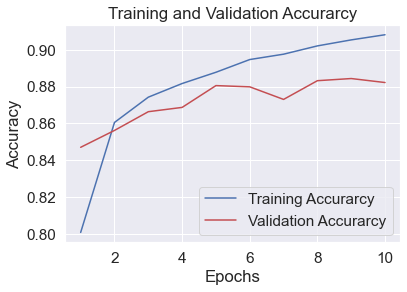

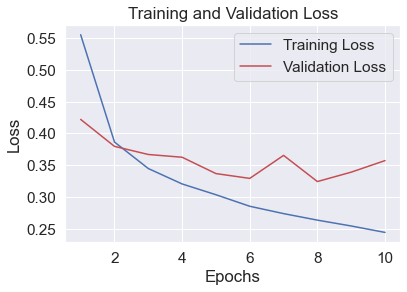

In [242]:
#Plotting The Graphs for Accuracy and Loss of Model2
sns.set_style("darkgrid")
acc = M2.history['accuracy']
val_acc = M2.history['val_accuracy']
loss = M2.history['loss']
val_loss = M2.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [243]:
#Calculating the Confusion Matrix of Model2
from sklearn.metrics import classification_report, confusion_matrix
Y_pred2 = model2.predict(x_test, len(y_test)//batch_size)
y_pred2 = np.argmax(Y_pred2, axis=1)
print('Confusion Matrix')
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

33/33 [==============================] - 0s 2ms/step
Confusion Matrix
[[839  11  14  39   7   0  77   0  13   0]
 [  1 971   1  18   8   0   0   0   1   0]
 [ 18   1 701   9 196   0  72   0   3   0]
 [ 15  28  11 856  74   0  11   1   4   0]
 [  0   1  56  10 896   0  29   0   8   0]
 [  0   0   0   0   0 960   0  31   1   8]
 [146   5  53  33 132   0 608   0  23   0]
 [  0   0   0   0   0   9   0 981   0  10]
 [  5   0   0   3   4   1   1   5 981   0]
 [  0   0   0   0   0  15   1  70   0 914]]


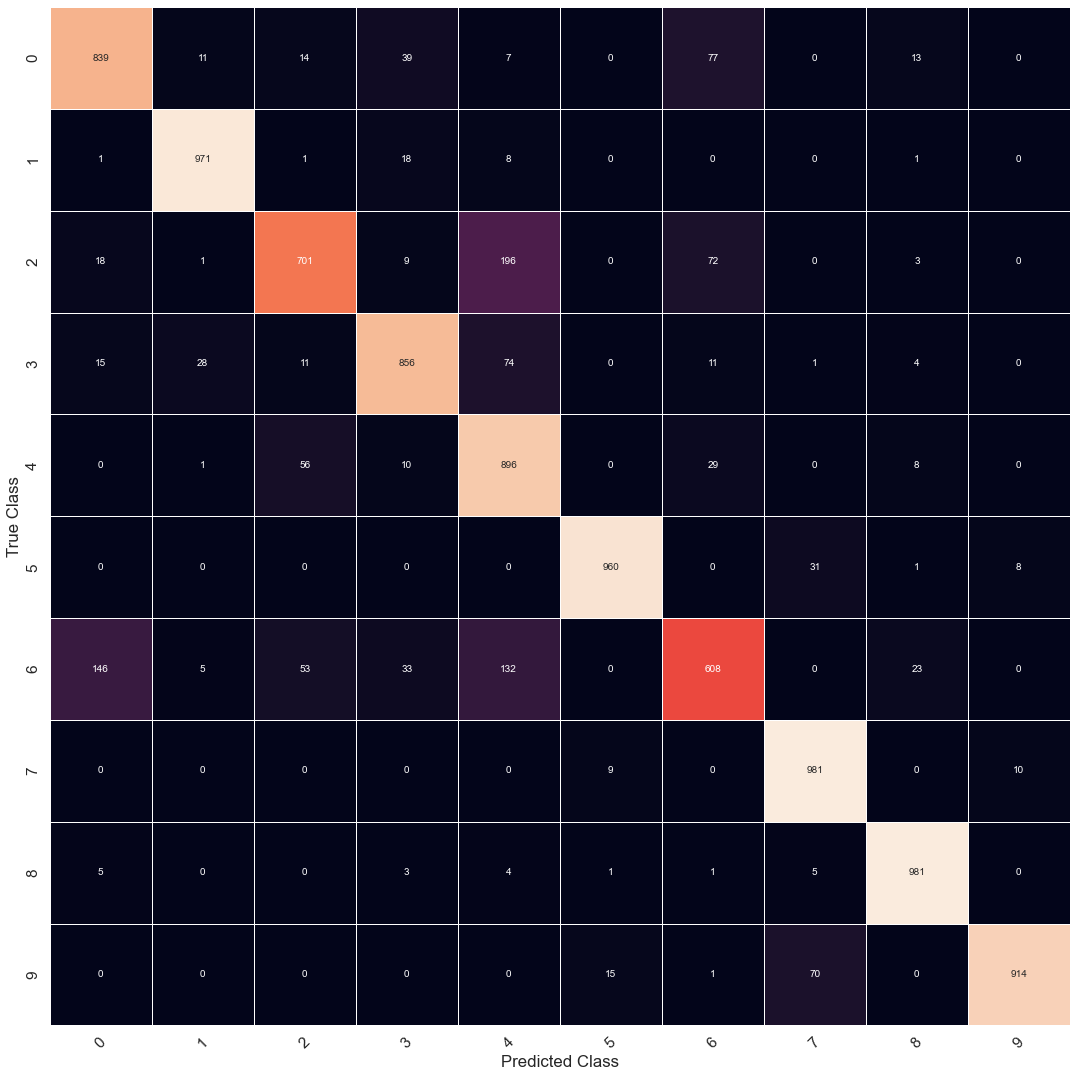

In [244]:
#Plotting The Confusion Matrix using Seaborn of Model2
class_labels=["0", "1","2","3","4","5","6","7","8","9"]
confusion_matrix = pd.DataFrame(cm2, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) 
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt="g", linewidths=1, cbar=False)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [245]:
#Evaluating The Model2
model2.evaluate(x_test, y_test)
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred2))

313/313 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8707
Accuracy :  0.8707


#### Comparing their performances

   We saw that the accuracy of the 1st model(0.8791) when compared to that of the second model(0.8707), is more but not much. They are almost the same. This tells us that by adding very few hidden layers decreases the accuracy by very few decimals.

   By looking at the confusion matrix,we can also observe that  some mismatches are less in model 1 as compared to model 2 while other are more in model 1 as compared to model 2.
